## MLP using Sklearn

In [25]:
# ! pip install neupy

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import numpy


In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [6]:
# load pima indians dataset
dataset = numpy.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [7]:
# train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [8]:
#Normalization

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### sgd and lbfgs does not seem to converge successfully for 2000 epoch

In [ ]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', max_iter=2000, solver='adam', verbose=2)  
mlp.fit(X_train, y_train)  

In [18]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.74609375
[[138  29]
 [ 36  53]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       167
         1.0       0.65      0.60      0.62        89

    accuracy                           0.75       256
   macro avg       0.72      0.71      0.71       256
weighted avg       0.74      0.75      0.74       256



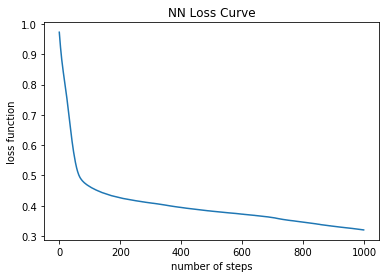

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [19]:
mlp.intercepts_[0]

array([ 0.0057607 ,  0.13349997,  0.2129469 ,  0.09009583,  0.09825845,
        0.16090888,  0.25996614, -0.23334645, -0.24213752,  0.21700685])

In [20]:
mlp.coefs_[0]

array([[ 0.15661045, -0.35288451, -0.16385021, -0.32570933,  0.61029932,
        -0.47064291,  0.34854302,  0.36759701,  0.52923893, -0.65198392],
       [ 0.66329843, -0.89976152, -0.93081936, -0.78941145,  0.69339974,
        -0.89887192,  0.95634998,  1.26409705,  0.87669653, -0.88266337],
       [-0.07183837,  0.14071409,  0.21144308, -0.00489838, -0.25277276,
         0.42336574, -0.29081769, -0.3803609 , -0.23241369, -0.06056518],
       [-0.09533688,  0.13839994,  0.26327683,  0.10111665, -0.06469944,
         0.46128029, -0.17397851, -0.34878485, -0.06016014,  0.23886148],
       [-0.00838809, -0.05854288, -0.15300625, -0.00491911,  0.2809478 ,
        -0.15832559, -0.15462667, -0.01896173,  0.03674184, -0.40882336],
       [ 0.72061104, -0.61653864, -0.86176496, -0.47806024,  0.60324264,
        -1.12574646,  0.32967111,  0.91595105,  1.02377236, -0.70129917],
       [ 0.50453594, -0.366336  , -0.53931941, -0.18635378,  0.12909609,
        -0.37220999,  0.30793918,  0.25165208

## MLP using keras

### Keras is the most used deep learning framework among top-5 winning teams on Kaggle. Because Keras makes it easier to run new experiments, it empowers you to try more ideas than your competition, faster

In [ ]:
# keras depends on tensorflow2
# ! pip install tensorflow --upgrade #2.3
# ! pip install keras --upgrade #2.4.3

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


# create keras model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))

# trying with Dropout
model.add(Dropout(0.2))

# trying with softmax, but does not seem to work, why???
# model.add(Dense(1, kernel_initializer='uniform', activation='softmax'))

model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 104       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


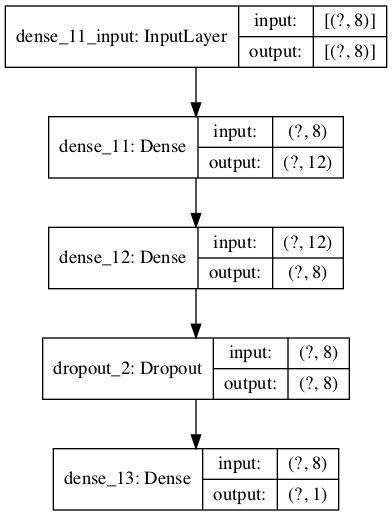

In [33]:
#conda install pydot pydotplus

from keras.utils import plot_model
import IPython
plot_model(model, to_file='model.png',show_shapes=True)
IPython.display.Image("model.png")

In [34]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model

history=model.fit(X_train, y_train, validation_split=0.3, epochs=80, batch_size=5)
# calculate predictions

Epoch 1/80
72/72 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.6480 - val_loss: 0.6835 - val_accuracy: 0.6299
Epoch 2/80
72/72 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6592 - val_loss: 0.6407 - val_accuracy: 0.6299
Epoch 3/80
72/72 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.6704 - val_loss: 0.5699 - val_accuracy: 0.6558
Epoch 4/80
72/72 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.7346 - val_loss: 0.5302 - val_accuracy: 0.7662
Epoch 5/80
72/72 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.7737 - val_loss: 0.5045 - val_accuracy: 0.7662
Epoch 6/80
72/72 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7793 - val_loss: 0.4881 - val_accuracy: 0.7662
Epoch 7/80
72/72 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7849 - val_loss: 0.4828 - val_accuracy: 0.7597
Epoch 8/80
72/72 [==

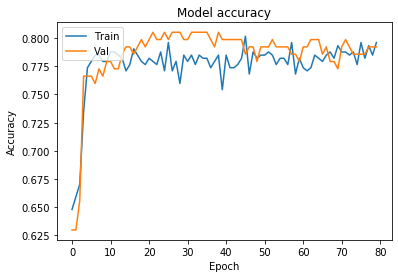

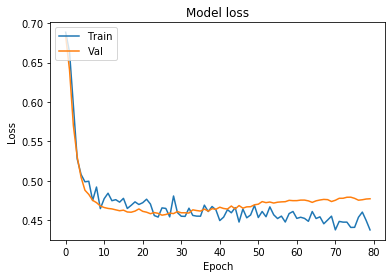

In [35]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [38]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-0.18096317, -0.15717867,  0.14665842,  0.14715624, -0.09594812,
         0.23672731, -0.10688927, -0.15339132,  0.09704744, -0.06520409,
         0.2595527 , -0.22627133],
       [-0.32013047, -0.25174347, -0.31944364, -0.28347746, -0.34247497,
         0.3491092 , -0.2457651 , -0.19553153,  0.34613538, -0.45395076,
         0.27684712, -0.08639539],
       [ 0.25738302,  0.12035106, -0.16992758, -0.18545663,  0.1563853 ,
        -0.24731892,  0.19593285,  0.18565534, -0.12154912,  0.1365979 ,
         0.14548479, -0.00637965],
       [-0.17599991,  0.10257773, -0.22212532, -0.16312963,  0.03111505,
        -0.1635916 , -0.1641546 , -0.01734938, -0.04582961, -0.02713607,
         0.10003335, -0.03989425],
       [-0.02277612, -0.01056812,  0.08915704,  0.04742735,  0.03378455,
        -0.0769527 ,  0.03137077, -0.10870232, -0.003472  ,  0.14530227,
         0.03901289, -0.06136831],
       [-0.17994627, -0.13984112, -0.15148853, -0.18178943, -0.1031359 ,
         0.10671853, 

In [39]:
predictions = model.predict(X_test)  
p_labels = [round(x[0]) for x in predictions]


In [40]:
print("Accuracy", metrics.accuracy_score(y_test, p_labels))
print(confusion_matrix(y_test,p_labels))  
print(classification_report(y_test,p_labels))  

Accuracy 0.7578125
[[141  26]
 [ 36  53]]
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       167
         1.0       0.67      0.60      0.63        89

    accuracy                           0.76       256
   macro avg       0.73      0.72      0.73       256
weighted avg       0.75      0.76      0.75       256

